# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 11/3/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 11/3/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1218,38928341,3.1
Albania,3956,2877800,137.5
Algeria,3898,43851043,8.9
Andorra,1099,77265,1422.4
Angola,3239,32866268,9.9
Antigua and Barbuda,6,97928,6.1
Argentina,157951,45195777,349.5
Armenia,26246,2963234,885.7
Australia,164,25459700,0.6


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Belgium,199155,11589616,1718.4
Czechia,154070,10708982,1438.7
Andorra,1099,77265,1422.4
Luxembourg,7963,625976,1272.1
Switzerland,90540,8654618,1046.1
Slovenia,21400,2078932,1029.4
Liechtenstein,379,38137,993.8
Armenia,26246,2963234,885.7
Netherlands,123233,17134873,719.2


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

10/30/20    517736.0
10/31/20    531790.0
11/1/20     552060.0
11/2/20     569598.0
11/3/20     577131.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

10/21/20        NaN
10/22/20     5952.0
10/23/20    22236.0
10/24/20     8688.0
10/25/20     2900.0
10/26/20    12560.0
10/27/20    13161.0
10/28/20    23553.0
10/29/20    11382.0
10/30/20    19382.0
10/31/20    14054.0
11/1/20     20270.0
11/2/20     17538.0
11/3/20      7533.0
Name: Germany, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


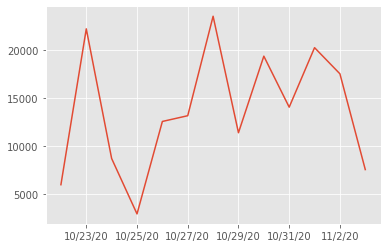

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

213.89420132938358